In [ ]:
# Import needed modules and read in titanic data
import pandas as pd
import numpy as np
data = pd.read_csv('data.csv')

In [3]:
# Clean '?' in the age and fare columns and replacing them with NaN
data.replace('?', np.nan, inplace= True)

# Update age and fare with their correct data type
data = data.astype({"age": np.float64, "fare": np.float64}) 

<AxesSubplot:xlabel='survived', ylabel='fare'>

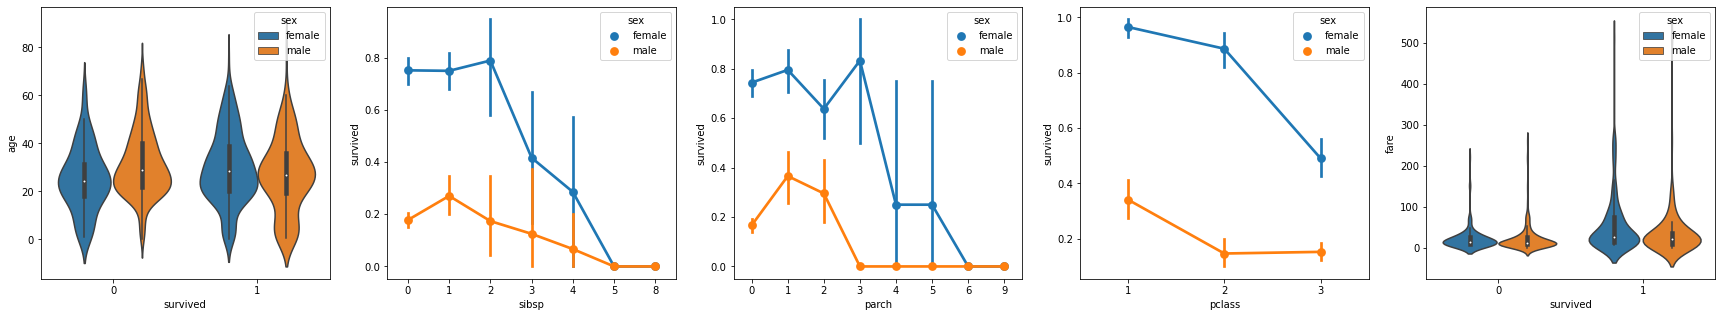

In [5]:
# Import seaborn and matplotlib for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Generate various plots

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

In [6]:
# Convert gender data from characters to integers
data.replace({'male': 1, 'female': 0}, inplace=True)

# Analyze correlation between all the variables and survival
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265


In [7]:
# Combine variables sibsp (siblings) and parch(parents and children) into one column that accounts for having relatives on board

data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
data.corr().abs()[["survived"]]


,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265
relatives,0.201719


In [9]:
# Drop the low correlating data and drop all NaN values to clean the data

data = data[['sex', 'pclass','age','relatives','fare','survived']].dropna()

In [15]:
# Divide the data into training data and validation data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data[['sex','pclass','age','relatives','fare']], data.survived, test_size=0.2, random_state=0)

In [16]:
# Perform feature scaling to make sure that the features are treated equally, regardless of magnitude 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [17]:
# Pick a learning algorithm, for now using Gausian classifier, Naive Bayes 

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)


GaussianNB()

In [18]:
# now test the model against the data that was saved from the split earlier

from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

0.7464114832535885
